In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import plot_tree 
import gc
import seaborn as sns

In [ ]:
trainfile = r'/gdrive/My Drive/ASSIGNMENT1/train_set.csv'
train_df = pd.read_csv(trainfile)  #creates a dataframe
testfile = r'/gdrive/My Drive/ASSIGNMENT1/test_set.csv'
test_df = pd.read_csv(testfile)  #creates a dataframe

# **MODEL 1**

In [ ]:
train_df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160,0


In [ ]:
traindf_copy = train_df.copy()

In [ ]:
traindf_copy.isnull().sum().sort_values(ascending=False)


ID                         0
imp_trasp_var17_in_ult1    0
ind_var7_emit_ult1         0
imp_venta_var44_ult1       0
imp_venta_var44_hace3      0
                          ..
num_op_var40_hace3         0
num_op_var40_hace2         0
num_var25                  0
num_var25_0                0
TARGET                     0
Length: 371, dtype: int64

In [ ]:
traindf_copy = traindf_copy.drop('ID', axis=1)

In [ ]:
TrainCols = list(traindf_copy.columns.values)

In [ ]:
X1 = traindf_copy[TrainCols[0:len(TrainCols)-1]].copy()
Y1 = traindf_copy[['TARGET']].copy()
print(X1.shape)
print(Y1.shape)


(76020, 369)
(76020, 1)


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,Y1, test_size=0.3, random_state=0)

In [ ]:
dtc1 = DecisionTreeClassifier (criterion = "gini",
            random_state = 42,max_depth=5, min_samples_leaf=5)

In [ ]:
dtc1.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
pred_val1 = dtc1.predict(X1_test)

In [ ]:
 print ("Accuracy : ",
    accuracy_score(y1_test, pred_val1)*100)

Accuracy :  95.98789792159957


In [ ]:
confusion_matrix = confusion_matrix(y1_test, pred_val1)
print("Confusion matrix:\n%s" % confusion_matrix) 

Confusion matrix:
[[21890     2]
 [  913     1]]


In [ ]:
test_id= test_df['ID']
test_df.drop(['ID'], axis=1, inplace= True)

In [ ]:
pred_val_test_model1 = dtc1.predict(test_df)

In [ ]:
results = pd.DataFrame({"ID":test_id, "TARGET": pred_val_test_model1})
results.to_csv("/gdrive/My Drive/ASSIGNMENT1/results_model1.csv", index=False)

# **MODEL 2**

In [ ]:
train_df.shape

(76020, 371)

In [ ]:
train_id= train_df['ID']
#test_id= test_df['ID']

train_df.drop(['ID'], axis=1, inplace= True)
#test_df.drop(['ID'], axis=1, inplace= True)

In [ ]:
y_train= train_df['TARGET']
#train_df= train_df.drop('TARGET', axis=1)


In [ ]:
train_df.shape

(76020, 370)

In [ ]:
train_df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [ ]:
df1=train_df[train_df["TARGET"]==0]
print(df1.shape)

(73012, 370)


In [ ]:
df2=df1.head(3008)

In [ ]:
df2.shape

(3008, 370)

In [ ]:
df2['TARGET'].value_counts()

0    3008
Name: TARGET, dtype: int64

In [ ]:
df3=train_df[train_df["TARGET"]==1]


In [ ]:
print(df3.shape)

(3008, 370)


In [ ]:
frames=[df2,df3]
train_df_new=pd.concat(frames)

In [ ]:
train_df_new.shape

(6016, 370)

In [ ]:
y_train= train_df_new['TARGET']
train_df= train_df_new.drop('TARGET', axis=1)

In [ ]:
train_df.shape

(6016, 369)

In [ ]:
#Checking for null values and infinity values:

print("Number of Null values {}".format(train_df.isnull().sum().sum()))
print("Number of Infinite values {}".format(train_df.isin([np.inf, -np.inf]).sum().sum()))

Number of Null values 0
Number of Infinite values 0


In [ ]:
y_train.shape

(6016,)

In [ ]:
#presence of constant features 
from sklearn.feature_selection import VarianceThreshold

vt= VarianceThreshold(threshold= 0) #threshold: features with set-variance 0 is removed
vt.fit(train_df)
const_feat= [x for x in train_df.columns if (x !='TARGET') and (x not in train_df.columns[vt.get_support()])]
print("There are {} constant features".format(len(const_feat)))

There are 91 constant features


In [ ]:
#presence of quassi constant features 
from sklearn.feature_selection import VarianceThreshold
vt= VarianceThreshold(threshold= 0.02) #threshold: features with set-variance less than this value is removed
vt.fit(train_df)

quasi_const_feat= [x for x in train_df.columns if ((x!='TARGET') and (x not in train_df.columns[vt.get_support()]))]

print("There are {} quassi-constant features".format(len(quasi_const_feat)))

There are 142 quassi-constant features


In [ ]:
#Identifying Sparse features:
zeros= (train_df == 0).astype(int).sum()
not_zeros= (train_df != 0).astype(int).sum()

sparse_columns=[]

for i in range(len(train_df.columns)):
  if (zeros[i]/(zeros[i]+not_zeros[i])) > 0.998:
    sparse_columns.append(train_df.columns[i])
print("There are {} sparse features".format(len(sparse_columns)))

There are 178 sparse features


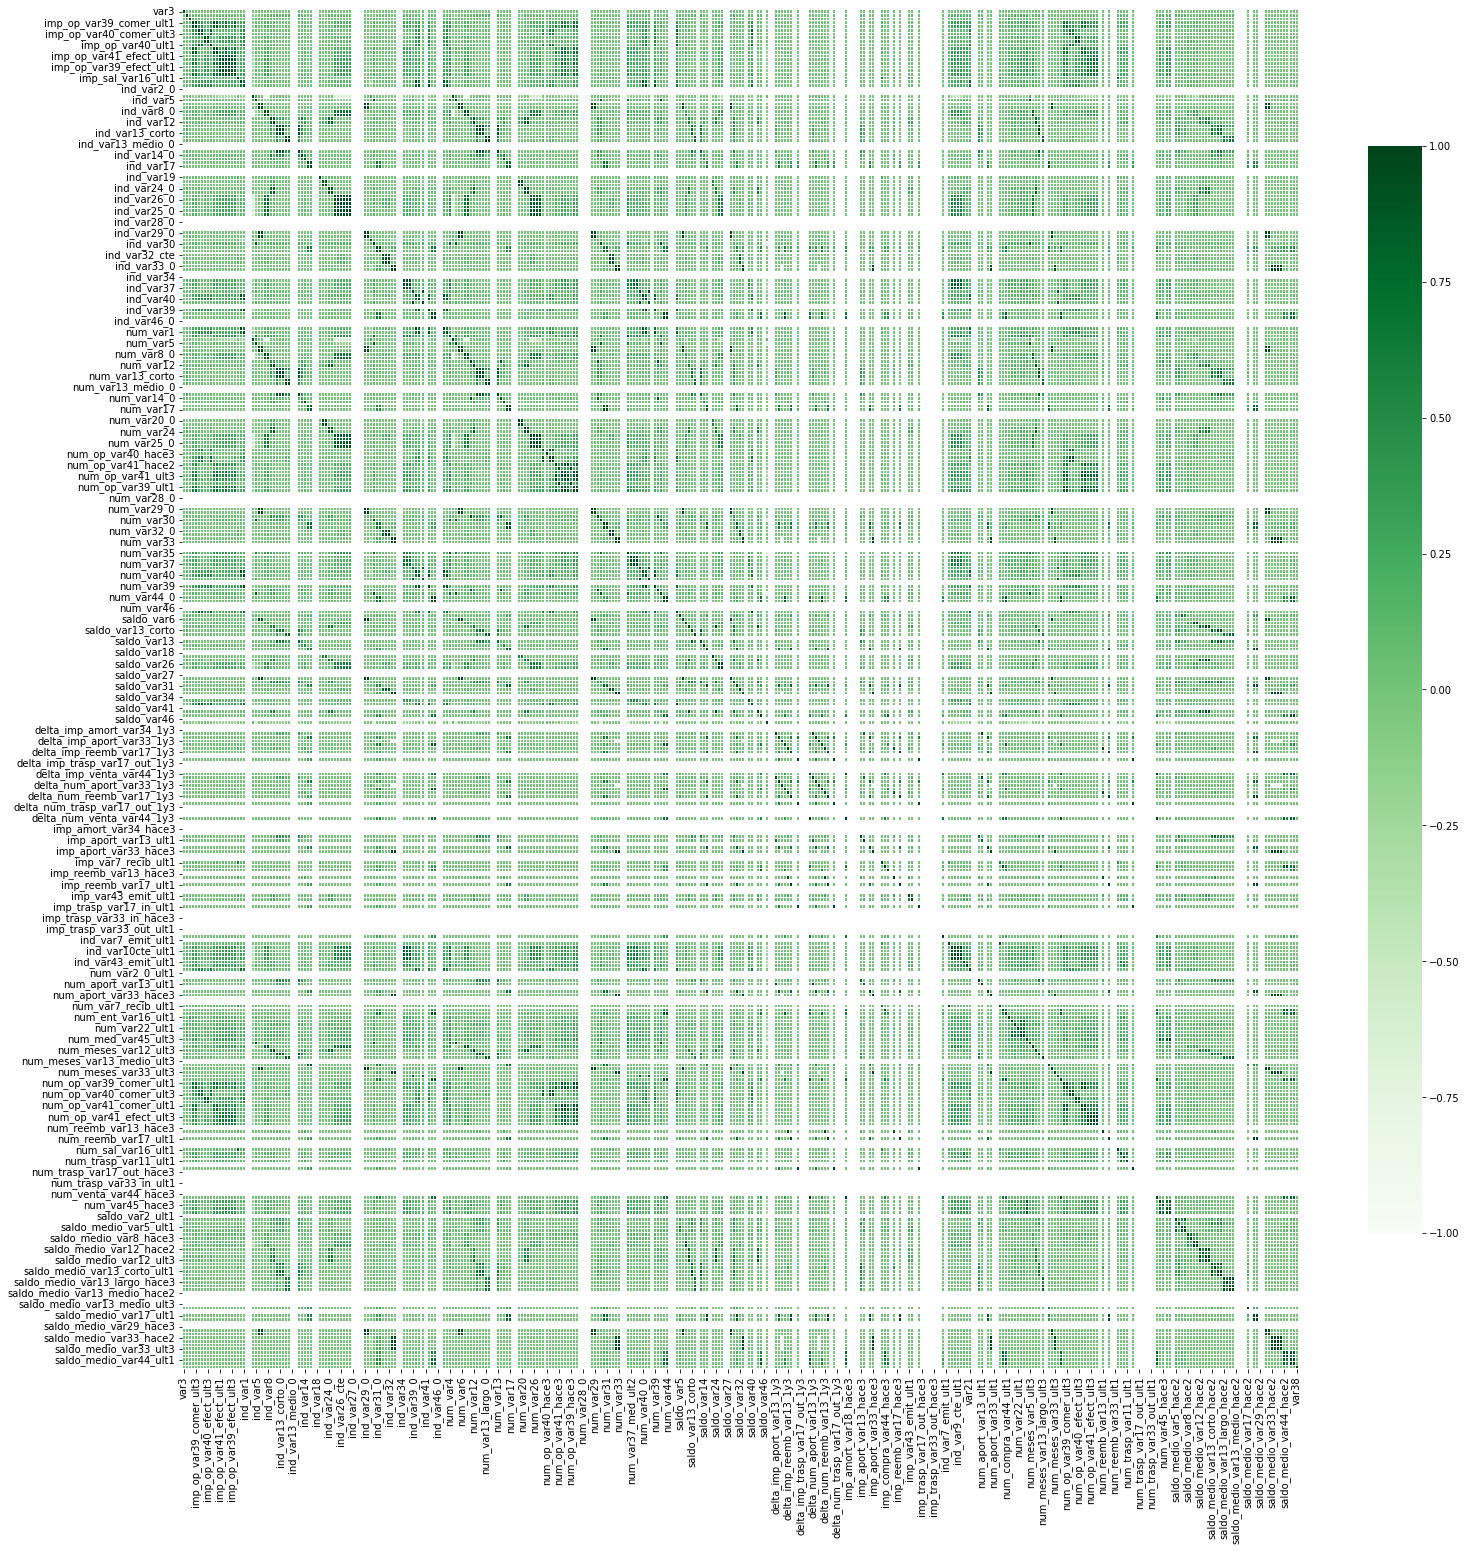

In [ ]:
#Correlations of features with heatmap:
fig, ax_1 = plt.subplots(figsize=(25, 25))


# plot heatmap
sns.heatmap(train_df.corr(), vmin= -1, vmax=1.00,
           linewidth=0.01,cmap="Greens", cbar_kws={"shrink": .8}, ax=ax_1)

plt.show()

In [ ]:
train_df.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,...,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6.016000e+03
mean,-496.195977,36.270279,70.615956,81.371988,125.825770,7.055889,11.568526,1.755319,2.338763,6.696109,...,0.559418,2.537558,0.332473,2.501749,1.790595,14.747608,3.290421,30.647867,24.407394,1.085404e+05
std,22327.246379,12.948716,1085.215244,414.488207,603.214169,160.943703,263.425543,45.324110,60.040432,159.537105,...,43.390087,196.820315,25.787594,194.042826,138.883707,685.023666,244.295634,1045.447559,841.439700,1.189587e+05
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048518e+04
25%,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.208000e+04
50%,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.670004e+04
75%,2.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.173110e+05
max,229.000000,102.000000,51003.000000,12888.030000,13183.230000,7904.220000,11073.570000,1800.000000,3000.000000,7904.220000,...,3365.460000,15265.950000,2000.160000,15050.520000,10772.220000,44990.490000,18928.590000,47617.080000,36988.200000,5.431378e+06


In [ ]:
train_df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [ ]:
#Analysing feature var 15
np.sort(pd.unique(train_df['var15']))

array([  5,  10,  11,  13,  14,  15,  17,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        93,  94, 100, 102])

In [ ]:
counts, bins = np.histogram(train_df)

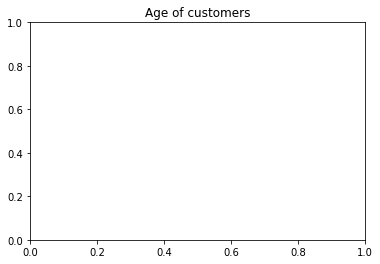

In [ ]:
plt.title('Age of customers')
plt.show()

In [ ]:
train_df['num_var4'].value_counts()

0    2499
1    2254
2     806
3     356
4      85
5      15
6       1
Name: num_var4, dtype: int64

In [ ]:
#Features with no variance don't contribute at all in classification process. So in next cell we will identify such features and remove them.

def remove_const_feature(train= train_df, test=test_df, threshold=0):
  from sklearn.feature_selection import VarianceThreshold

  vt= VarianceThreshold(threshold= threshold) #threshold: features with set-variance 0 is removed
  vt.fit(train_df)
  const_feat= [x for x in train_df.columns if (x !='TAREGT') and (x not in train.columns[vt.get_support()])]

  print("Number of columns before: {} ".format(train_df.shape[1]))
  train_df.drop(const_feat, axis=1, inplace=True)
  test_df.drop(const_feat, axis=1, inplace=True)

  print("{} features with 0 variance have been removed".format(len(const_feat)))
  print("Number of columns in train dataset after: {} ".format(train_df.shape[1]))
  print("Number of columns in test dataset after: {} ".format(test_df.shape[1]))
  print("----------------------------------------")

In [ ]:
remove_const_feature(train_df,test_df)

Number of columns before: 369 
91 features with 0 variance have been removed
Number of columns in train dataset after: 278 
Number of columns in test dataset after: 278 
----------------------------------------


In [ ]:
#Removing Quassi constant features (features with very little variance):

def remove_quassi_const_feat(train= train_df, test= test_df, threshold=0.0005):
  from sklearn.feature_selection import VarianceThreshold

  vt= VarianceThreshold(threshold= threshold) #threshold: features with set-variance less than this value is removed
  vt.fit(train_df)

  quasi_const_feat= [x for x in train_df.columns if ((x!='TARGET') and (x not in train_df.columns[vt.get_support()]))]

  print("Number of columns before: {} ".format(train_df.shape[1]))

  train_df.drop(quasi_const_feat, axis=1, inplace= True)
  test_df.drop(quasi_const_feat, axis=1, inplace= True)

  print("{} features with very little variance have been removed".format(len(quasi_const_feat)))
  print("Number of columns in train dataset after: {} ".format(train_df.shape[1]))
  print("Number of columns in test dataset after: {} ".format(test_df.shape[1]))
  print("----------------------------------------")

In [ ]:
remove_quassi_const_feat(train_df)

Number of columns before: 278 
9 features with very little variance have been removed
Number of columns in train dataset after: 269 
Number of columns in test dataset after: 269 
----------------------------------------


In [ ]:
#Removing features which are highly correlated to each other:
def del_correlated_feats(train= train_df, test=test_df, threshold=0.98):

  correlated_columns=  []
  correlations= train_df.corr() #computes pairwise correlation of columns

  for i in range(len(train_df.columns)):
    for j in range(i):
      if (correlations.iloc[i,j] >= threshold) and (correlations.columns[j] not in correlated_columns): #if correlation greater than threshold
        correlated_columns.append(correlations.columns[i]) #add that column name to list

  print("Number of columns before: {} ".format(train_df.shape[1]))
  print("Number of columns before: {} ".format(test_df.shape[1]))

  print("Number of correlated features being removed: {}".format(len(correlated_columns)))

  train_df.drop(set(correlated_columns), axis=1, inplace= True)
  test_df.drop(set(correlated_columns), axis=1, inplace= True)

  print("Number of columns in train dataset after: {} ".format(train_df.shape[1]))
  print("Number of columns in test dataset after: {} ".format(test_df.shape[1]))
  print("----------------------------------------")

In [ ]:
del_correlated_feats(train_df, test_df)

Number of columns before: 269 
Number of columns before: 269 
Number of correlated features being removed: 89
Number of columns in train dataset after: 180 
Number of columns in test dataset after: 180 
----------------------------------------


In [ ]:
#Removing Sparse features:
def remove_sparse_feats(train= train_df, test= test_df, threshold= 0.998):
  zeros= (train_df == 0).astype(int).sum()
  not_zeros= (train_df != 0).astype(int).sum()

  sparse_columns=[]

  for i in range(len(train_df.columns)):
    if (zeros[i]/(zeros[i]+not_zeros[i])) > threshold:
      sparse_columns.append(train_df.columns[i])

  print("number of columns before: {}".format(train_df.shape[1]))
  print("number of columns before: {}".format(test_df.shape[1]))

  train_df.drop(sparse_columns, axis=1, inplace= True)
  test_df.drop(sparse_columns, axis=1, inplace= True)

  print("number of columns in train dataset after: {}".format(train_df.shape[1]))
  print("number of columns in test dataset after: {}".format(test_df.shape[1]))
  print("----------------------------------------")

In [ ]:
remove_sparse_feats(train_df, test_df)

number of columns before: 143
number of columns before: 143
number of columns in train dataset after: 143
number of columns in test dataset after: 143
----------------------------------------


In [ ]:
def age_below_23(train= train_df, test= test_df):
  for df in [train, test]:
    below_23= []
    for i in (df['var15']):
      if i < 23:
        below_23.append(1)
      else:
        below_23.append(0)

    df['below_23']= below_23
    print ("added new feature whether age is below 23 or not")
    print("----------------------------------------")

In [ ]:
age_below_23(train_df,test_df)

added new feature whether age is below 23 or not
----------------------------------------
added new feature whether age is below 23 or not
----------------------------------------


In [ ]:
def age_above_80(train= train_df, test= test_df):
  for df in [train, test]:
    above_80= []
    for i in (df['var15']):
      if i > 80:
        above_80.append(1)
      else:
        above_80.append(0)

    df['above_80']= above_80
    print ("added new feature whether age is above 80 or not")
    print("----------------------------------------")

In [ ]:
age_above_80(train_df,test_df)

added new feature whether age is above 80 or not
----------------------------------------
added new feature whether age is above 80 or not
----------------------------------------


In [ ]:
def value_saldo_medio_var5_ult3(train= train_df, test= test_df):
  for df in [train, test]:
    value_saldo_medio_var5_ult3= []
    for i in (df['saldo_medio_var5_ult3']):
      if (i == 0.0):
        value_saldo_medio_var5_ult3.append(1)
      else:
        value_saldo_medio_var5_ult3.append(0)

    df['value_saldo_medio_var5_ult3']= value_saldo_medio_var5_ult3
    print ("added new feature whether value of saldo_medio_var5_ult3 is equal to 0 or not")
    print("----------------------------------------")

In [ ]:
value_saldo_medio_var5_ult3(train_df,test_df)

added new feature whether value of saldo_medio_var5_ult3 is equal to 0 or not
----------------------------------------
added new feature whether value of saldo_medio_var5_ult3 is equal to 0 or not
----------------------------------------


In [ ]:
print (train_df.shape)

print(y_train.shape)

(6016, 146)
(6016,)


Text(0.5, 0, 'Random Forest Feature Importance')

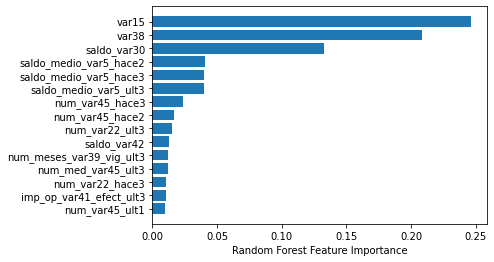

In [ ]:
# decissiontree for feature importance:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train_df, y_train)

# get importance
importance = model.feature_importances_

# before feat engg
sorted_idx = importance.argsort()[-15:]
plt.barh(train_df.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## **MODEL 2**

In [ ]:

train_x, test_x, train_y,test_y = train_test_split( train_df, y_train, test_size=0.3, random_state=0)

In [ ]:
model2 = DecisionTreeClassifier(criterion = "gini",
            random_state = 0,max_depth=3)

In [ ]:
model2.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
pred_y2=model2.predict(test_x)

In [ ]:
print ("Accuracy : ",
    accuracy_score(test_y, pred_y2)*100)


Accuracy :  72.68698060941828


In [ ]:
pred_val_test_model2=model2.predict(test_df)

In [ ]:
results = pd.DataFrame({"ID":test_id, "TARGET": pred_val_test_model2})
results.to_csv("/gdrive/My Drive/ASSIGNMENT1/results_model_22.csv", index=False)

DECISION TREE MODEL


# **MODEL 3**

In [ ]:

model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                random_state=0, min_samples_split=3
                              )

model = DecisionTreeClassifier=(criterion='gini', splitter='best', max_depth=3, 
                                min_samples_split=3, min_samples_leaf=3, min_weight_fraction_leaf=2.0, 
                                max_features=None, random_state=0, max_leaf_nodes=3, 
                                min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [ ]:
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=0)

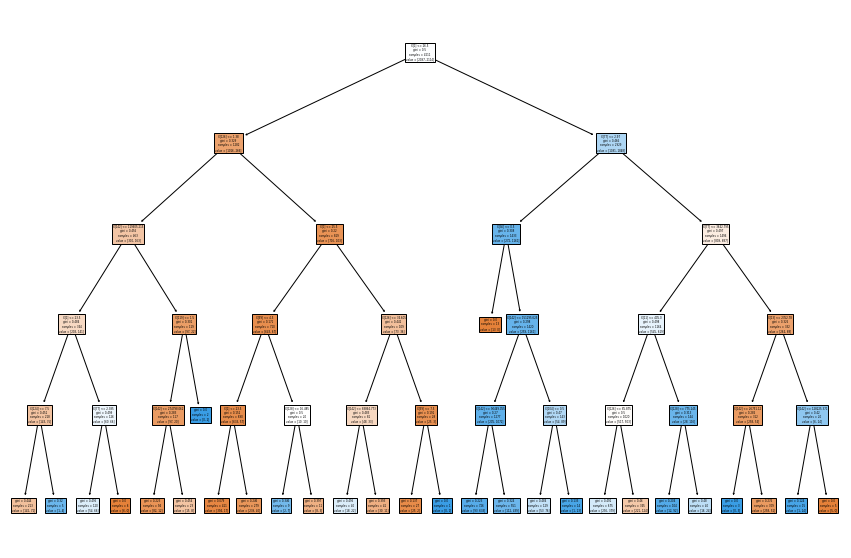

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, filled=True)

In [ ]:
pred_y= model.predict(test_x)

In [ ]:
print ("Accuracy : ",
    accuracy_score(test_y, pred_y)*100)

Accuracy :  74.01662049861496


In [ ]:
pred_val_test_model3= model.predict(test_df)

In [ ]:
results3 = pd.DataFrame({"ID":test_id, "TARGET": pred_val_test_model3})
results3.to_csv("/gdrive/My Drive/ASSIGNMENT1/results_xx.csv", index=False)